#**PROBLEMA DE NEGOCIO**


---




La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

#**1. Configuración del Ambiente**


---




In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
global df_banco, resultados

#**2. Preprocesamiento de Datos**


---


In [2]:
df_banco = pd.read_csv("german_credit.csv")
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
df_banco.columns = ['categoria_cliente', 'estado_cuenta', 'duracion_meses', 'historial_crediticio', 'proposito',
              'monto_credito', 'cuenta_ahorros', 'empleo_actual', 'tasa_cuota', 'estado_sexual',
              'otros_garantes', 'residencia_actual', 'propiedad', 'edad', 'otros_planes_cuotas',
              'vivienda', 'creditos_banco_actual', 'trabajo', 'personas_mantenimiento', 'telefono',
              'trabajador_extranjero']

In [4]:
df_banco.head(2)

,categoria_cliente,estado_cuenta,duracion_meses,historial_crediticio,proposito,monto_credito,cuenta_ahorros,empleo_actual,tasa_cuota,estado_sexual,otros_garantes,residencia_actual,propiedad,edad,otros_planes_cuotas,vivienda,creditos_banco_actual,trabajo,personas_mantenimiento,telefono,trabajador_extranjero
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes


In [5]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   categoria_cliente       1000 non-null   int64 
 1   estado_cuenta           1000 non-null   object
 2   duracion_meses          1000 non-null   int64 
 3   historial_crediticio    1000 non-null   object
 4   proposito               1000 non-null   object
 5   monto_credito           1000 non-null   int64 
 6   cuenta_ahorros          1000 non-null   object
 7   empleo_actual           1000 non-null   object
 8   tasa_cuota              1000 non-null   int64 
 9   estado_sexual           1000 non-null   object
 10  otros_garantes          1000 non-null   object
 11  residencia_actual       1000 non-null   int64 
 12  propiedad               1000 non-null   object
 13  edad                    1000 non-null   int64 
 14  otros_planes_cuotas     1000 non-null   object
 15  vivie

### Eliminar datos duplicados

In [6]:
 #df_banco = df_banco.drop_duplicates()

In [7]:
# Mostrar datos duplicados antes de eliminar
duplicados = df_banco[df_banco.duplicated()]
duplicados
print(f"\nCantidad de datos duplicados antes de eliminar: {duplicados.shape[0]}\n")

# Eliminar duplicados
df_banco = df_banco.drop_duplicates()

# Mostrar datos duplicados después de eliminar
duplicados_despues = df_banco[df_banco.duplicated()]
duplicados_despues
print(f"\nCantidad de datos duplicados después de eliminar: {duplicados_despues.shape[0]}\n")



Cantidad de datos duplicados antes de eliminar: 0


Cantidad de datos duplicados después de eliminar: 0



### Ver datos nulos

In [8]:
df_banco.isnull().sum()

categoria_cliente         0
estado_cuenta             0
duracion_meses            0
historial_crediticio      0
proposito                 0
monto_credito             0
cuenta_ahorros            0
empleo_actual             0
tasa_cuota                0
estado_sexual             0
otros_garantes            0
residencia_actual         0
propiedad                 0
edad                      0
otros_planes_cuotas       0
vivienda                  0
creditos_banco_actual     0
trabajo                   0
personas_mantenimiento    0
telefono                  0
trabajador_extranjero     0
dtype: int64

### Tratamiento de nulos, eliminar nulos

In [9]:

print("\nCantidad total de datos nulos antes de eliminar:", df_banco.isnull().sum().sum())

# Eliminar los registros con valores nulos
df_banco = df_banco.dropna()

# Mostrar la cantidad total de datos nulos después de eliminar
print("Cantidad total de datos nulos después de eliminar:", df_banco.isnull().sum().sum())



Cantidad total de datos nulos antes de eliminar: 0
Cantidad total de datos nulos después de eliminar: 0


In [10]:
df_banco.head(2)

,categoria_cliente,estado_cuenta,duracion_meses,historial_crediticio,proposito,monto_credito,cuenta_ahorros,empleo_actual,tasa_cuota,estado_sexual,otros_garantes,residencia_actual,propiedad,edad,otros_planes_cuotas,vivienda,creditos_banco_actual,trabajo,personas_mantenimiento,telefono,trabajador_extranjero
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes


### Tratando variables categóricas

In [11]:
df_banco.dtypes

categoria_cliente          int64
estado_cuenta             object
duracion_meses             int64
historial_crediticio      object
proposito                 object
monto_credito              int64
cuenta_ahorros            object
empleo_actual             object
tasa_cuota                 int64
estado_sexual             object
otros_garantes            object
residencia_actual          int64
propiedad                 object
edad                       int64
otros_planes_cuotas       object
vivienda                  object
creditos_banco_actual      int64
trabajo                   object
personas_mantenimiento     int64
telefono                  object
trabajador_extranjero     object
dtype: object

#### Recorremos cada columna del df para ver explorar y ver cuantos valores tienen c/u, letras donde deberia haber numeros, valores extraños.
- este código proporciona información sobre la frecuencia de valores únicos en cada columna del DataFrame para realizar un análisis exploratorio de los datos y comprender la distribución de los valores en cada columna.



In [12]:
for columna in df_banco.columns:
    print('=========' * 10)
    print(df_banco[columna].value_counts())

0    700
1    300
Name: categoria_cliente, dtype: int64
no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: estado_cuenta, dtype: int64
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: duracion_meses, dtype: int64
existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly 

In [29]:
# Obtener todas las columnas categóricas
#columnas_categoricas = df_banco.select_dtypes(include=['object']).columns



- categoria_cliente: Valores 0 y 1, se refiere a las categorías de los clientes. Tipo int.
- estado_cuenta: Muestra el estado de la cuenta. Categoría cualitativa.
- duracion_meses: Muestra la duración en meses. Tipo int.
- historial_crediticio: Historial crediticio del cliente. Categoría cualitativa.
- proposito: Propósito del crédito. Categoría cualitativa.
- monto_credito: Monto del crédito. Tipo int.
- cuenta_ahorros: Cuenta de ahorros/bonos. Categoría cualitativa.
- empleo_actual: Estado laboral actual. Categoría cualitativa.
- tasa_cuota: Tasa de cuota en porcentaje del ingreso disponible. Tipo int.
- estado_sexual: Estado y género del cliente. Categoría cualitativa.

- otros_garantes: ninguno 907, garante 52, co-solicitante 41. Categoríca.
- residencia_actual: cantidad de años de residencia:
    - 4    413,
    - 2    308
    - 3    149
    - 1    130. Tipo int.
    
- propiedad: Tipo de propiedad.Categoríca.
    - si no A121/A122: automóvil u otro, no en el atributo 6 332
    - bienes raíces 282
    - si no A121: contrato de ahorro de sociedad de construcción/seguro de vida 232
    - desconocido / sin propiedad 154

- edad: Edad del cliente en años, hay mayores de 70 años. Tipo int. 
- otros_planes_cuotas:  indica la existencia de otros planes de cuotas que el cliente puede tener. Categoríca.
    - ninguno 814
    - banco 139
    - tiendas 47 

- vivienda: Tipo de vivienda propia, alquilada o no paga. Categoríca.
    - propio 713
    - alquilar 179
    - gratis 108   

- creditos_banco_actual: numero de creditos existentes en este banco. Tipo int.
la mayoría de los clientes tienen 1 o 2 creditos actuales en el banco

- trabajo: Tipo de trabajo indican la diferentes categorías de empleo entre los clientes. Categoríca.
    - empleado calificado / oficial 630
    - no calificado - residente 200
    - directivo/autónomo/empleado altamente cualificado/oficina 148
    - desempleados/no cualificados - no residente 22   
 
 

- personas_mantenimiento: Número de personas a cargo,describe la cantidad de personas que el cliente esta obligado a mantener financieramente. Tipo int.
   - 1    845
   - 2    155

- telefono: Indicación de si el cliente tiene teléfono registrado. Categoríca.
    - ninguno 596
    - sí, registrado a nombre del cliente 404

- trabajador_extranjero: Indicación de si el cliente es trabajador extranjero. Categoríca.

In [13]:
otros_garantes            object
residencia_actual          int64
propiedad                 object
edad                       int64
otros_planes_cuotas       object
vivienda                  object
creditos_banco_actual      int64
trabajo                   object
personas_mantenimiento     int64
telefono                  object
trabajador_extranjero     object

SyntaxError: invalid syntax (<ipython-input-13-46e7593e59e6>, line 1)

#### ver valores unico de otros_garantes( object)
- ninguno 907
- garante 52
- co-solicitante 41

none            907
guarantor        52
co-applicant     41
Name: otros_garantes, dtype: int64


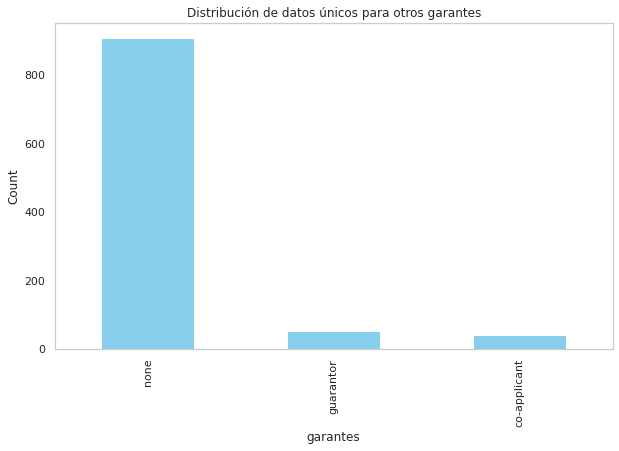

In [44]:
print(df_banco['otros_garantes'].value_counts())
plt.figure(figsize=(10, 6))
df_banco['otros_garantes'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de datos únicos para otros garantes')
plt.xlabel('garantes')
plt.ylabel('Count')
plt.grid(False)
plt.show()

In [ ]:
ver valores unico de residencia_actual

4    413
2    308
3    149
1    130
Name: residencia_actual, dtype: int64


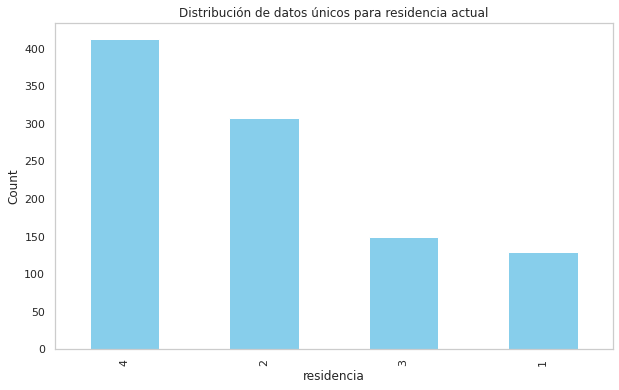

In [46]:
print(df_banco['residencia_actual'].value_counts())
plt.figure(figsize=(10, 6))
df_banco['residencia_actual'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de datos únicos para residencia actual')
plt.xlabel('residencia')
plt.ylabel('Count')
plt.grid(False)
plt.show()

 #### ver valores unico de propiedad (object)
- si no A121/A122: automóvil u otro, no en el atributo 6 332
- bienes raíces 282
- si no A121: contrato de ahorro de sociedad de construcción/seguro de vida 232
- desconocido / sin propiedad 154

if not A121/A122 : car or other, not in attribute 6                 332
real estate                                                         282
if not A121 : building society savings agreement/ life insurance    232
unknown / no property                                               154
Name: propiedad, dtype: int64


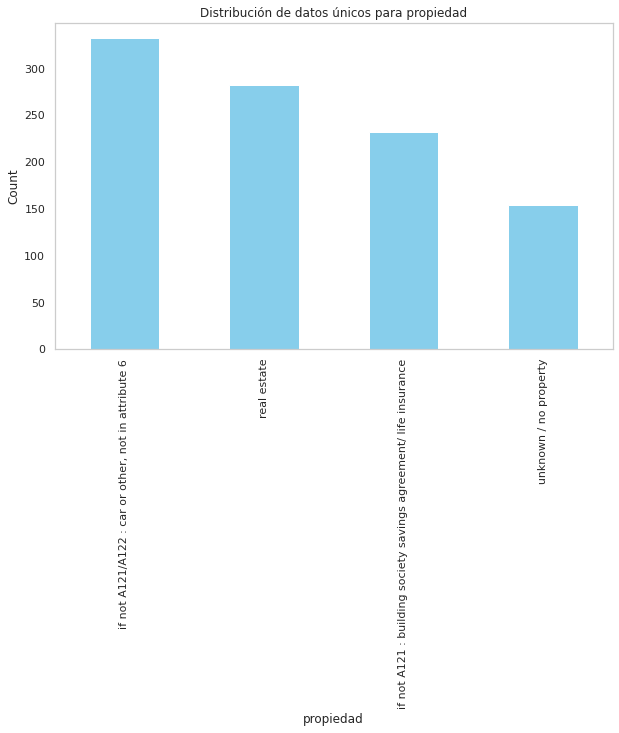

In [47]:
print(df_banco['propiedad'].value_counts())
plt.figure(figsize=(10, 6))
df_banco['propiedad'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de datos únicos para propiedad')
plt.xlabel('propiedad')
plt.ylabel('Count')
plt.grid(False)
plt.show()

 #### ver valores unico de edad
    - hay personas de 70,74,75 , se le puede dar un credito?

27    51
26    50
23    48
24    44
28    43
25    41
30    40
35    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
43    17
47    17
44    17
41    17
45    15
20    14
21    14
49    14
50    12
48    12
54    10
57     9
52     9
51     8
55     8
63     8
61     7
53     7
60     6
65     5
58     5
64     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
19     2
62     2
70     1
Name: edad, dtype: int64


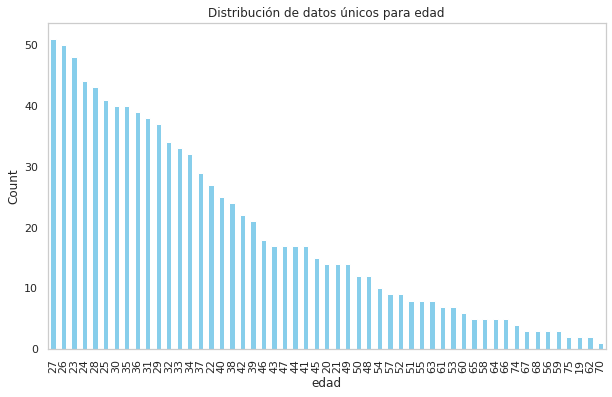

In [49]:
print(df_banco['edad'].value_counts())
plt.figure(figsize=(10, 6))
df_banco['edad'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de datos únicos para edad')
plt.xlabel('edad')
plt.ylabel('Count')
plt.grid(False)
plt.show()

 #### ver valores unico de otros_planes_cuotas (object)
  indica la existencia de otros planes de cuotas que el cliente puede tener
- ninguno 814
- banco 139
- tiendas 47    

none      814
bank      139
stores     47
Name: otros_planes_cuotas, dtype: int64


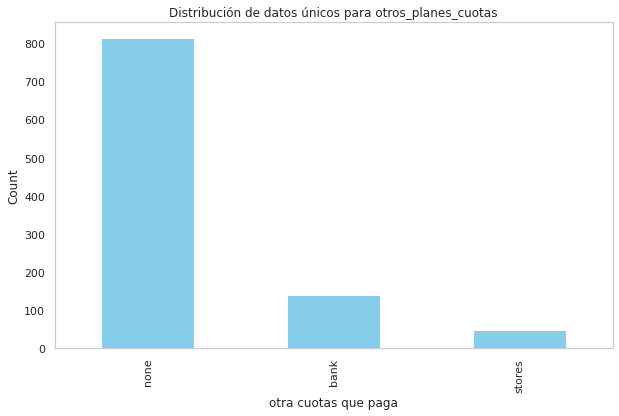

In [52]:
print(df_banco['otros_planes_cuotas'].value_counts())
plt.figure(figsize=(10, 6))
df_banco['otros_planes_cuotas'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de datos únicos para otros_planes_cuotas')
plt.xlabel('otra cuotas que paga')
plt.ylabel('Count')
plt.grid(False)
plt.show()

 #### ver valores unico de vivienda(object)
- propio 713
- alquilar 179
- gratis 108    
    

own         713
rent        179
for free    108
Name: vivienda, dtype: int64


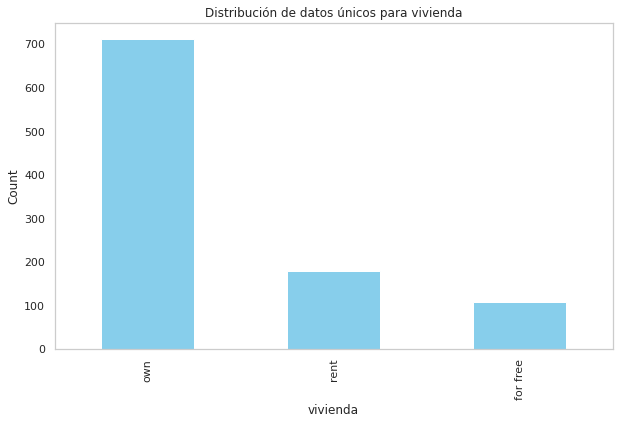

In [54]:
print(df_banco['vivienda'].value_counts())
plt.figure(figsize=(10, 6))
df_banco['vivienda'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de datos únicos para vivienda')
plt.xlabel('vivienda')
plt.ylabel('Count')
plt.grid(False)
plt.show()

 #### ver valores unico de creditos_banco_actual
- 1    633
- 2    333
- 3     28
- 4      6    
la mayoría de los clientes tienen 1 o 2 creditos actuales en el banco

1    633
2    333
3     28
4      6
Name: creditos_banco_actual, dtype: int64


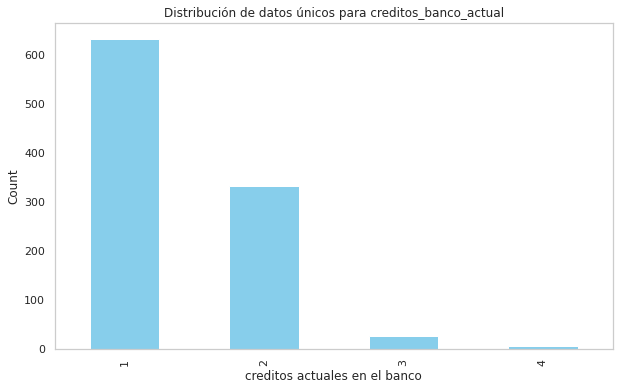

In [57]:
print(df_banco['creditos_banco_actual'].value_counts())
plt.figure(figsize=(10, 6))
df_banco['creditos_banco_actual'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de datos únicos para creditos_banco_actual')
plt.xlabel('creditos actuales en el banco')
plt.ylabel('Count')
plt.grid(False)
plt.show()

 #### ver valores unico de trabajo (abject)
- empleado calificado / oficial 630
- no calificado - residente 200
- directivo/autónomo/empleado altamente cualificado/oficina 148
- desempleados/no cualificados - no residente 22   
 indican la diferentes categorías de empleo entre los clientes

skilled employee / official                                      630
unskilled - resident                                             200
management/ self-employed/ highly qualified employee/ officer    148
unemployed/ unskilled - non-resident                              22
Name: trabajo, dtype: int64


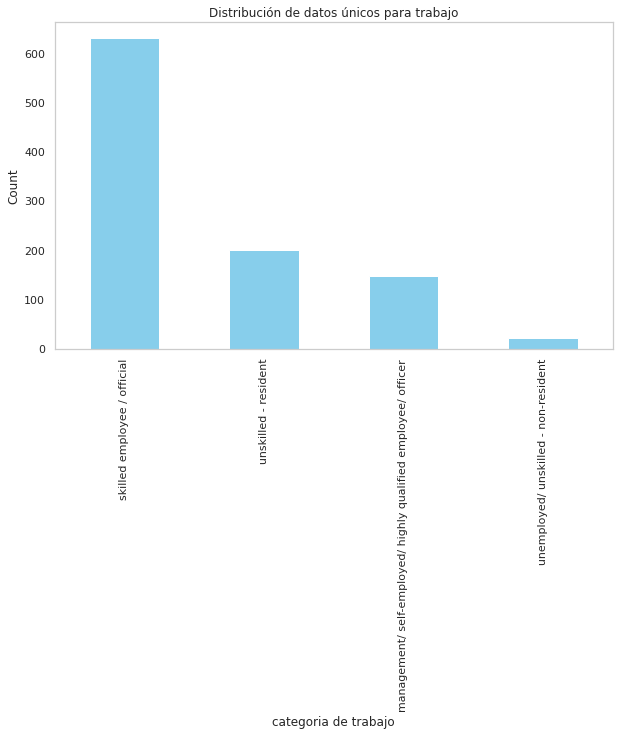

In [59]:
print(df_banco['trabajo'].value_counts())
plt.figure(figsize=(10, 6))
df_banco['trabajo'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de datos únicos para trabajo')
plt.xlabel('categoria de trabajo')
plt.ylabel('Count')
plt.grid(False)
plt.show()

#### ver valores unico de personas_mantenimiento
describe la cantidad de personas que el cliente esta obligado a mantener financieramente   
- 1    845
- 2    155

1    845
2    155
Name: personas_mantenimiento, dtype: int64


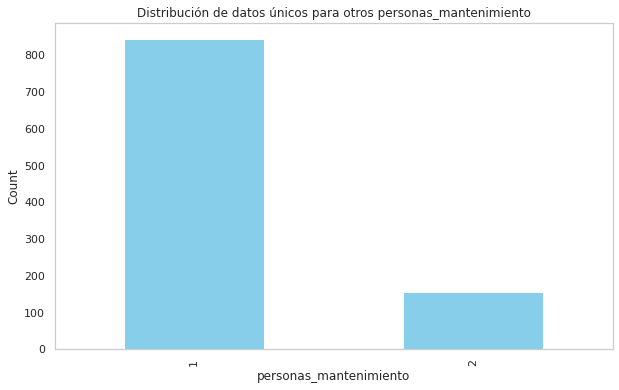

In [60]:
print(df_banco['personas_mantenimiento'].value_counts())
plt.figure(figsize=(10, 6))
df_banco['personas_mantenimiento'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de datos únicos para otros personas_mantenimiento')
plt.xlabel('personas_mantenimiento')
plt.ylabel('Count')
plt.grid(False)
plt.show()

 #### ver valores unico de telefono (object)
- ninguno 596
- sí, registrado a nombre del cliente 404

none                                         596
yes, registered under the customers name     404
Name: telefono, dtype: int64


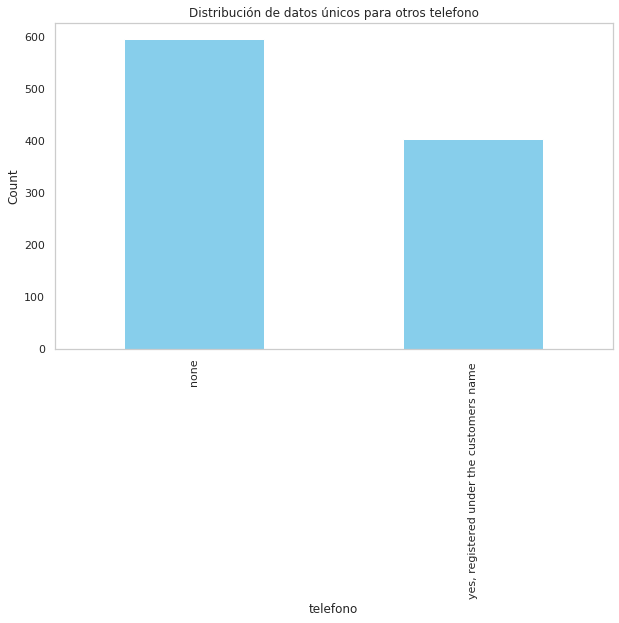

In [61]:
print(df_banco['telefono'].value_counts())
plt.figure(figsize=(10, 6))
df_banco['telefono'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de datos únicos para otros telefono')
plt.xlabel('tiene telefono')
plt.ylabel('Count')
plt.grid(False)
plt.show()

### ver valores unico de trabajador_extranjero
- Indicación de si el cliente es trabajador extranjer

In [33]:
df_banco.trabajador_extranjero.unique()

array(['yes', 'no'], dtype=object)

yes    963
no      37
Name: trabajador_extranjero, dtype: int64


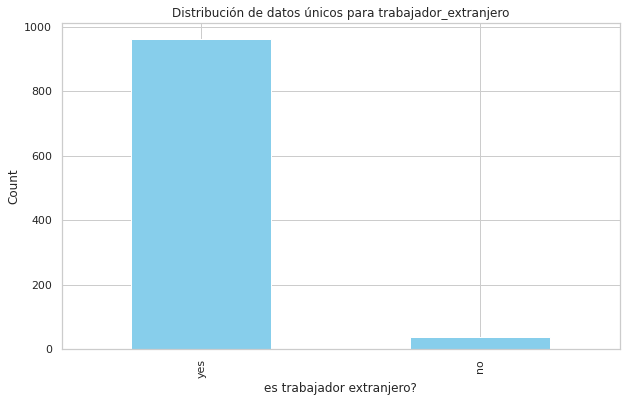

In [63]:
print(df_banco['trabajador_extranjero'].value_counts())
plt.figure(figsize=(10, 6))
df_banco['trabajador_extranjero'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de datos únicos para trabajador_extranjero')
plt.xlabel('es trabajador extranjero?')
plt.ylabel('Count')
plt.show()
